# Predicting Most liked Area in the city

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

In [54]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [100]:
CLIENT_ID = 'RDMBXZ0UGL3X2FNWJVRTY01J05QRPUPNQQQVZ2EFVN003R54' # your Foursquare ID
CLIENT_SECRET = 'SBEQWXNBDQJIZ10HX5K3SF214VJNYFDGERAC1V5P1SUFU1EZ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RDMBXZ0UGL3X2FNWJVRTY01J05QRPUPNQQQVZ2EFVN003R54
CLIENT_SECRET:SBEQWXNBDQJIZ10HX5K3SF214VJNYFDGERAC1V5P1SUFU1EZ


# Data acquisition and cleaning

In [145]:
address = 'Delhi'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# latitude = 12.952580
# longitude = 77.699881

print(latitude, longitude)

28.6517178 77.2219388


In [146]:
search_query = 'cafe'
radius = 10000
print(search_query + ' .... OK!')

cafe .... OK!


In [147]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/search?client_id=RDMBXZ0UGL3X2FNWJVRTY01J05QRPUPNQQQVZ2EFVN003R54&client_secret=SBEQWXNBDQJIZ10HX5K3SF214VJNYFDGERAC1V5P1SUFU1EZ&ll=28.6517178,77.2219388&v=20180604&query=cafe&radius=10000&limit=100'

In [148]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f23f97ed46d721c65bdbca4'},
 'response': {'venues': [{'id': '4e2befd4aeb745b1fac8a7a3',
    'name': 'Café Nirvana',
    'location': {'address': 'Main Bazar Rd.',
     'lat': 28.641333522569326,
     'lng': 77.21468332222602,
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.641333522569326,
       'lng': 77.21468332222602}],
     'distance': 1355,
     'cc': 'IN',
     'city': 'New Delhi',
     'state': 'Delhi',
     'country': 'India',
     'formattedAddress': ['Main Bazar Rd.', 'New Delhi', 'Delhi', 'India']},
    'categories': [{'id': '4bf58dd8d48988d16d941735',
      'name': 'Café',
      'pluralName': 'Cafés',
      'shortName': 'Café',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1596193296',
    'hasPerk': False},
   {'id': '50bcb63ee4b0bedc1d3c28f7',
    'name': 'Cafe Coffee Day Square',
    'location': {'address': 'C Block',


In [150]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,location.neighborhood
0,4e2befd4aeb745b1fac8a7a3,Café Nirvana,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1596193296,False,Main Bazar Rd.,28.641334,77.214683,"[{'label': 'display', 'lat': 28.64133352256932...",1355,IN,New Delhi,Delhi,India,"[Main Bazar Rd., New Delhi, Delhi, India]",NaN,NaN,NaN
1,50bcb63ee4b0bedc1d3c28f7,Cafe Coffee Day Square,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1596193296,False,C Block,28.634295,77.220345,"[{'label': 'display', 'lat': 28.6342949764577,...",1945,IN,Delhi,Delhi,India,"[C Block (CP), Delhi, Delhi, India]",CP,NaN,NaN
2,4b63ce73f964a5207a922ae3,Cafe Coffee Day,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1596193296,False,Connaught Place,28.633841,77.217909,"[{'label': 'display', 'lat': 28.63384138790699...",2028,IN,New Delhi,Delhi,India,"[Connaught Place (P Block), New Delhi 110001, ...",P Block,110001,NaN
3,4d6b798b2ea9b1f78cf9d028,Cafe Coffee Day,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1596193296,False,Outer Circle Connaught Place,28.631340,77.221726,"[{'label': 'display', 'lat': 28.63133963244659...",2268,IN,New Delhi,Delhi,India,"[Outer Circle Connaught Place (N Blk), New Del...",N Blk,NaN,NaN
4,5117d099e4b0bae1afcea5c6,Café Coffee Day,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1596193296,False,Inside Regal Building,28.631054,77.216978,"[{'label': 'display', 'lat': 28.631054, 'lng':...",2350,IN,New Delhi,Delhi,India,"[Inside Regal Building (Connaught Place, Near ...","Connaught Place, Near Regal Cinema",110001,NaN


# Methodology - Scatter plot

In [21]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [137]:
X = dataframe['location.lat']

In [138]:
Y = dataframe['location.lng']

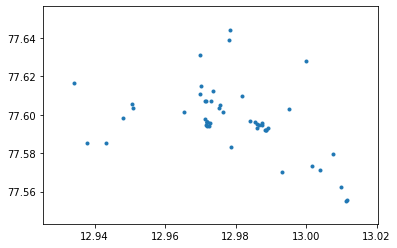

In [139]:
plt.scatter(X, Y, marker='.')

# Result - Visualization Through Map

In [151]:

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=14)

# display the map of San Francisco
sanfran_map

In [152]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(dataframe['location.lat'], dataframe['location.lng']):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

latitudes = list(dataframe['location.lat'])
longitudes = list(dataframe['location.lng'])
labels = list(dataframe.name)
# labels = ['cafe']

# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(sanfran_map)   

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=folium.Popup(label, parse_html=True, max_width='100%')).add_to(sanfran_map)   
    
    
# add incidents to map
sanfran_map.add_child(incidents)


